# Minimal example with TensorFlow 2.0


## Import the relevant libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [28]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [29]:
training_data = np.load('TF_intro.npz')

In [30]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 40.3855 - 251ms/epoch - 8ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1899 - 39ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4601 - 32ms/epoch - 998us/step
Epoch 4/100
32/32 - 0s - loss: 0.4099 - 32ms/epoch - 994us/step
Epoch 5/100
32/32 - 0s - loss: 0.3658 - 33ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3966 - 33ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3700 - 32ms/epoch - 994us/step
Epoch 8/100
32/32 - 0s - loss: 0.3728 - 31ms/epoch - 955us/step
Epoch 9/100
32/32 - 0s - loss: 0.3871 - 33ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3838 - 31ms/epoch - 974us/step
Epoch 11/100
32/32 - 0s - loss: 0.3721 - 36ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.4216 - 31ms/epoch - 978us/step
Epoch 13/100
32/32 - 0s - loss: 0.4120 - 33ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3882 - 32ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4668 - 33ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3718 - 32ms/epoc

## Extract the weights and bias

In [31]:
model.layers[0].get_weights()

[array([[ 2.011995 ],
        [-3.0251005]], dtype=float32),
 array([5.0247574], dtype=float32)]

In [32]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.011995 ],
       [-3.0251005]], dtype=float32)

In [33]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0247574], dtype=float32)

## Extract the outputs (make predictions)

In [34]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ -7. ],
       [ 40.5],
       [ 18. ],
       [-26.7],
       [-13.4],
       [ 41.6],
       [-21.4],
       [-11.6],
       [-19.4],
       [  0.7],
       [ -7.8],
       [ 39.1],
       [-29.1],
       [ -9.5],
       [ 23.3],
       [ -8.6],
       [ 27.3],
       [  6.1],
       [ 47.3],
       [-13.3],
       [  0.8],
       [-13.4],
       [-10.4],
       [ 26.5],
       [ 18.3],
       [  0.5],
       [  5.6],
       [-40.8],
       [-10.8],
       [ -5.8],
       [ 33.9],
       [ -3.6],
       [ -4.5],
       [ 25.2],
       [ 24.5],
       [ 22.5],
       [  5.6],
       [-24.4],
       [ 39.8],
       [ 32.4],
       [-12. ],
       [  5.4],
       [-14.7],
       [ -7.1],
       [-13.5],
       [ 18.1],
       [ -4.1],
       [  0.3],
       [-12.8],
       [ 11.1],
       [ 33.1],
       [-23.7],
       [ 36.2],
       [ 10.6],
       [ 25.2],
       [-18.5],
       [ -5.2],
       [  0.8],
       [ 41.7],
       [  3.3],
       [-25.6],
       [  0.1],
       [

In [35]:
training_data['targets'].round(1)

array([[ -6.8],
       [ 39.5],
       [ 17.2],
       [-26.4],
       [-12.7],
       [ 41.5],
       [-20.7],
       [-11.9],
       [-19.7],
       [  1.3],
       [ -8.2],
       [ 39.4],
       [-28.3],
       [ -8.9],
       [ 23.8],
       [ -8.6],
       [ 27.8],
       [  5.6],
       [ 47.8],
       [-13.3],
       [  0.8],
       [-13.3],
       [-10.6],
       [ 27.1],
       [ 19.1],
       [  0.8],
       [  4.9],
       [-39.8],
       [-10.3],
       [ -6. ],
       [ 34.2],
       [ -3.8],
       [ -4.8],
       [ 24.5],
       [ 25. ],
       [ 22.4],
       [  6.1],
       [-24.7],
       [ 39.6],
       [ 31.8],
       [-12.4],
       [  5.4],
       [-14.3],
       [ -6.9],
       [-13.5],
       [ 18.3],
       [ -3.4],
       [  1.3],
       [-12.2],
       [ 10. ],
       [ 33.3],
       [-24.5],
       [ 36.3],
       [ 11.3],
       [ 24.9],
       [-19.1],
       [ -5.2],
       [ -0. ],
       [ 41.6],
       [  4.2],
       [-25.9],
       [ -0.6],
       [

## Plotting the data

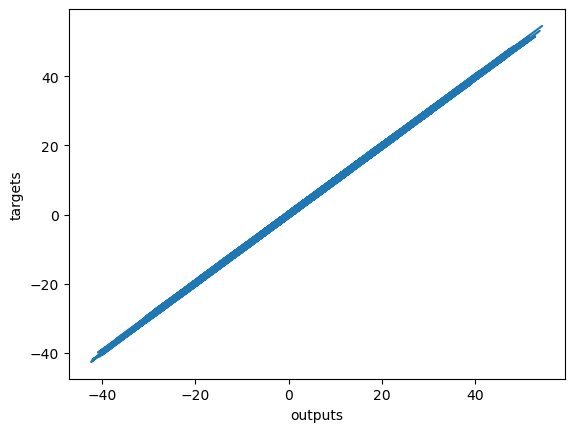

In [36]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()